In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import random
import time
from IPython.display import clear_output

Use the same grid as in Astar problem. Assume there is no graph available. Use RRT/ RRT* to sample paths, build a graph and find the shortest path

Make a gif of the path evolution




In [ ]:
# use np.load to load a grid of 1s and 0s
# 1 - occupied 0- free
grid = np.load("astar_grid.npy")

In [ ]:
# write the Euclidean function that takes in the
# node x, y and compute the distance
def euclidean(pointa, pointb):
    x1,y1 = pointa[0],pointa[1]
    x2,y2 = pointb[0],pointb[1]
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)
# def euclidean(pointa, pointb):
#     return np.sqrt((pointb[0]-pointa[0])**2 + (pointb[1]-pointa[1])**2)

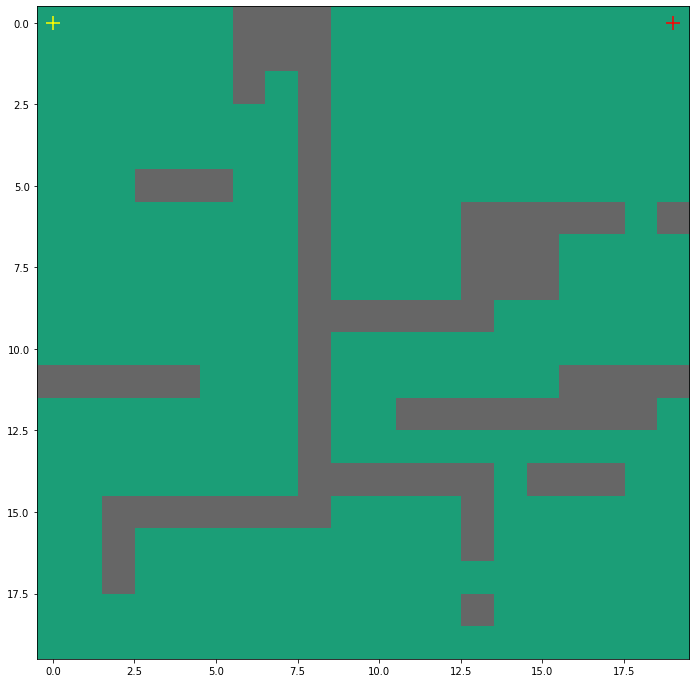

In [15]:

# you can define your own start/ end
start = (0,0)
goal = (0,19)

# visualize the start/ end and the robot's environment
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "+", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 200)
plt.show()

In [ ]:
class RRT:
  def __init__(self,start,goal,grid,explore_radius,iter):
    self.start = start
    self.goal = goal
    self.grid = grid
    self.explore_radius = explore_radius
    self.iter = iter

  def is_occupied(self,coord):
    tile_x = np.floor(coord[0]+0.5).astype('int')
    tile_y = np.floor(coord[1]+0.5).astype('int')
    if tile_x>19 or tile_x<0 or tile_y>19 or tile_y<0:
      return True 
    else:
      return self.grid[tile_x][tile_y]  

    # try:
    #   return bool(self.grid[tile_x][tile_y])
    # except Exception:
    #   return True  
  

  def explore(self,nodes):
    #nodes = nodes
    random_node = np.array([random.uniform(-0.5,19.5),random.uniform(-0.5,19.5)])
    
    shortest_distance = 30
    nearest_node = self.start
    
    for i in range(len(nodes)):
      node = np.array(nodes[i])
      
      
      if euclidean(node,random_node)<shortest_distance:
        nearest_node = np.array(node)
        shortest_distance = euclidean(node,random_node)
    exp_radius = 0    
    for i in range(np.floor(self.explore_radius/0.99).astype('int')):
      node_x = nearest_node[0] + 0.99*(1+i)*(random_node[0]-nearest_node[0])/shortest_distance
      node_y = nearest_node[1] + 0.99*(1+i)*(random_node[1]-nearest_node[1])/shortest_distance 
      if not self.is_occupied((node_x,node_y)):
        exp_radius += 0.99
      else:
        break  
    if exp_radius == 0:
      return self.explore(nodes)    
    else:
      radius = np.random.uniform(0.3,exp_radius)  
      new_node_x = nearest_node[0] + radius*(random_node[0]-nearest_node[0])/shortest_distance
      new_node_y = nearest_node[1] + radius*(random_node[1]-nearest_node[1])/shortest_distance 
      new_node = self.Node(new_node_x,new_node_y)
      new_node.parent_node = nearest_node
      nodes = np.append(nodes,[new_node.node],axis = 0)
      return nodes,new_node
    
      #coord = (new_node_x,new_node_y)



      

    # radius = np.random.uniform(0.3,self.explore_radius)  
    # new_node_x = nearest_node[0] + radius*(random_node[0]-nearest_node[0])/shortest_distance
    # new_node_y = nearest_node[1] + radius*(random_node[1]-nearest_node[1])/shortest_distance 
    
    # coord = (new_node_x,new_node_y)

    # if not self.is_occupied(coord):
    #   new_node = self.Node(new_node_x,new_node_y)
    #   new_node.parent_node = nearest_node
    #   nodes = np.append(nodes,[new_node.node],axis = 0)
    #   return nodes,new_node
    # else:
    #   return self.explore(nodes)  

  def display(self):
    all_nodes = np.array([self.start])
    edges = []
    for _ in range(self.iter):
      
      #clear_output(wait=True)
      clear_output(wait = True)
      fig, ax = plt.subplots(figsize=(8,8))
      ax.imshow(self.grid, cmap=plt.cm.Dark2)
      plt.axes(ax)
      plt.plot(all_nodes[:,1],all_nodes[:,0],'.',color = 'yellow')
      
      all_nodes,new_node = self.explore(all_nodes)
      x_values = [new_node.node[1],new_node.parent_node[1]]
      y_values = [new_node.node[0],new_node.parent_node[0]]
      edges.append([x_values,y_values])
      for edge in edges:
        plt.plot(edge[0], edge[1],'w')
      plt.show()
      #plt.pause(0.1)


  class Node:
    def __init__(self,x,y):
      self.x = x
      self.y = y
      self.parent_node = None
      self.node = np.array([x,y])



   

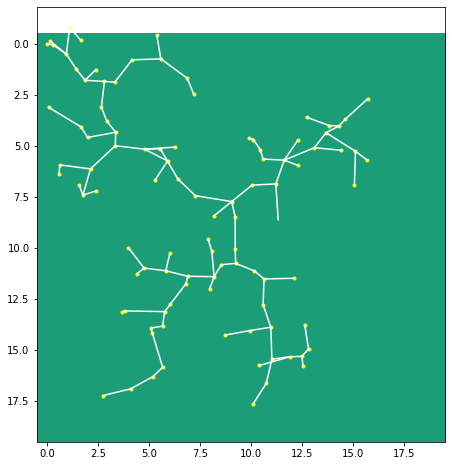

In [ ]:
grid1 = np.zeros((20,20))
start1 = np.array([0,0])
print('start = ',start1)
goal1 = np.array([19,19])
rrt = RRT(start1,goal1,grid1,2,100)
rrt.display()


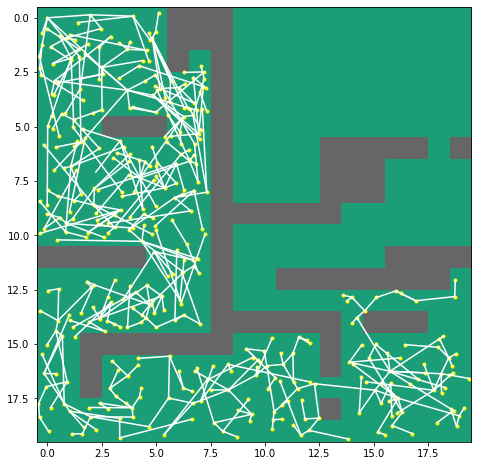

In [ ]:
grid = np.load("astar_grid.npy")
start1 = np.array([0,0])
print('start = ',start1)
goal1 = np.array([19,19])
rrt = RRT(start1,goal1,grid,4,500)
rrt.display()